In [4]:
import numpy as np
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout
from tensorflow.keras.optimizers import Adam

In [7]:
#Generate syntheic time series data:

def generete_time_series(num_semples,num_steps):
    freq1,freq2,offsets1,offsets2 = np.random.rand(4,num_semples,1)
    time = np.linspace(0,1,num_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq1 * 20 + 20))
    series += 0.1 * (np.random.rand(num_semples,num_steps)-0.5)
    return series[...,np.newaxis].astype(np.float32)


num_semples = 1000
num_steps = 50 
data = generete_time_series(num_semples,num_steps)
target = np.roll(data,-1,axis=1)    

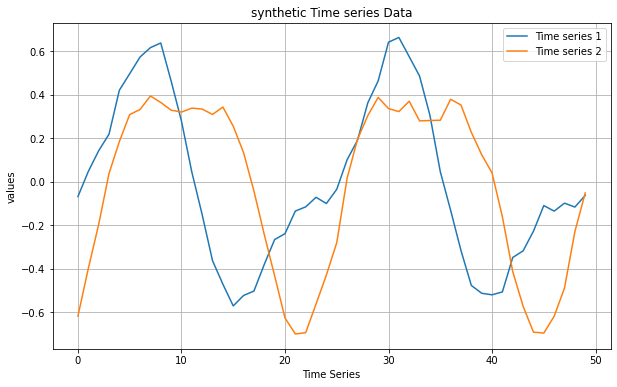

In [14]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))

for i in  range(2):
    plt.plot(data[i,:,0],label=f'Time series {i+1}')
    
plt.title('synthetic Time series Data')   
plt.xlabel("Time Series")
plt.ylabel("values")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
#Split the data into training and validation data:

train_size = 800
X_train,X_val = data[:train_size],data[train_size:]
y_train,y_val = target[:train_size],target[train_size:]

In [19]:
# Build The RNN model:

model = Sequential()

model.add(SimpleRNN(units=32,input_shape=(None,1),activation="relu"))
model.add(Dense(units=1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 32)                1088      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer=Adam(learning_rate=0.01),loss="mse")
                             

In [25]:
# Train the model:
model.fit(X_train,y_train,epochs=500,batch_size=16,validation_data=(X_val,y_val))

#Evaluate the model on the validation set:
val_loss = model.evaluate(X_val,y_val)
print("validation loss:",val_loss)

Epoch 1/500
50/50 [==============================] - 1s 5ms/step - loss: 0.1474 - val_loss: 0.1460
Epoch 2/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1451 - val_loss: 0.1460
Epoch 3/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1460
Epoch 4/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1460
Epoch 5/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1460
Epoch 6/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1451 - val_loss: 0.1461
Epoch 7/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1461
Epoch 8/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1460
Epoch 9/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1461
Epoch 10/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1451 - val_loss: 0.1460
Epoch 11/

50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1461
Epoch 84/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1460
Epoch 85/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1461
Epoch 86/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1462
Epoch 87/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1460
Epoch 88/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1460
Epoch 89/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1451 - val_loss: 0.1462
Epoch 90/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1461
Epoch 91/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1460
Epoch 92/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1460
Epoch 93/500


50/50 [==============================] - 0s 3ms/step - loss: 0.1452 - val_loss: 0.1461
Epoch 165/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1451 - val_loss: 0.1460
Epoch 166/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1451 - val_loss: 0.1460
Epoch 167/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1451 - val_loss: 0.1460
Epoch 168/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1451 - val_loss: 0.1469
Epoch 169/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1452 - val_loss: 0.1463
Epoch 170/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1451 - val_loss: 0.1461
Epoch 171/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1452 - val_loss: 0.1461
Epoch 172/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1451 - val_loss: 0.1461
Epoch 173/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1451 - val_loss: 0.1460
Epoc

50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1459
Epoch 246/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1451 - val_loss: 0.1459
Epoch 247/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1461
Epoch 248/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1461
Epoch 249/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1459
Epoch 250/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1460
Epoch 251/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1460
Epoch 252/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1461
Epoch 253/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1460
Epoch 254/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1459
Epoc

50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1459
Epoch 327/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1459
Epoch 328/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1459
Epoch 329/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1461
Epoch 330/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1449 - val_loss: 0.1459
Epoch 331/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1459
Epoch 332/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1459
Epoch 333/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1459
Epoch 334/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1449 - val_loss: 0.1459
Epoch 335/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1459
Epoc

50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1459
Epoch 408/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1459
Epoch 409/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1459
Epoch 410/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1460
Epoch 411/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1459
Epoch 412/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1451 - val_loss: 0.1459
Epoch 413/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1459
Epoch 414/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1460
Epoch 415/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1460
Epoch 416/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1459
Epoc

50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1459
Epoch 489/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1459
Epoch 490/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1449 - val_loss: 0.1460
Epoch 491/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1460
Epoch 492/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1460
Epoch 493/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1459
Epoch 494/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1450 - val_loss: 0.1461
Epoch 495/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1451 - val_loss: 0.1459
Epoch 496/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1449 - val_loss: 0.1459
Epoch 497/500
50/50 [==============================] - 0s 3ms/step - loss: 0.1449 - val_loss: 0.1460
Epoc

In [26]:
# Make prediction:
prediction = model.predict(X_val)

#print the first prediction:

print("First prediction:",prediction[0,:])

7/7 [==============================] - 0s 1ms/step
First prediction: [-0.01042524]


In [28]:
# Build the complex RNN model:

model = Sequential()

model.add(LSTM(units=64,return_sequences=True,input_shape=(None,1)))
model.add(LSTM(units=64,return_sequences=True,))
model.add(Dropout(0.2))
model.add(Dense(units=1))
lo

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 64)          16896     
                                                                 
 lstm_1 (LSTM)               (None, None, 64)          33024     
                                                                 
 dropout (Dropout)           (None, None, 64)          0         
                                                                 
 dense_2 (Dense)             (None, None, 1)           65        
                                                                 
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer=Adam(learning_rate=0.01),loss="mse")

In [33]:
model.fit(X_train,y_train,epochs=50,batch_size=16,validation_data=(X_val,y_val))

Epoch 1/50
50/50 [==============================] - 2s 19ms/step - loss: 0.0443 - val_loss: 0.0115
Epoch 2/50
50/50 [==============================] - 1s 12ms/step - loss: 0.0123 - val_loss: 0.0104
Epoch 3/50
50/50 [==============================] - 1s 12ms/step - loss: 0.0117 - val_loss: 0.0104
Epoch 4/50
50/50 [==============================] - 1s 12ms/step - loss: 0.0114 - val_loss: 0.0100
Epoch 5/50
50/50 [==============================] - 1s 12ms/step - loss: 0.0112 - val_loss: 0.0096
Epoch 6/50
50/50 [==============================] - 1s 12ms/step - loss: 0.0107 - val_loss: 0.0093
Epoch 7/50
50/50 [==============================] - 1s 12ms/step - loss: 0.0105 - val_loss: 0.0090
Epoch 8/50
50/50 [==============================] - 1s 12ms/step - loss: 0.0101 - val_loss: 0.0092
Epoch 9/50
50/50 [==============================] - 1s 12ms/step - loss: 0.0100 - val_loss: 0.0085
Epoch 10/50
50/50 [==============================] - 1s 12ms/step - loss: 0.0096 - val_loss: 0.0083
Epoch 11/

In [35]:
#evaluate the model on the validation set:

val_loss = model.evaluate(X_val,y_val)
print("evaluate loss:",val_loss)


7/7 [==============================] - 0s 6ms/step - loss: 0.0073
evaluate loss: 0.007301555946469307


In [39]:
prediction = model.predict(X_val)
print("validation :",prediction)

7/7 [==============================] - 0s 6ms/step
validation : [[[-0.51619685]
  [-0.59430647]
  [-0.39607835]
  ...
  [ 0.340819  ]
  [ 0.46893844]
  [ 0.49883425]]

 [[ 0.5864297 ]
  [ 0.57867026]
  [ 0.40694457]
  ...
  [-0.04638161]
  [ 0.1047645 ]
  [ 0.27540344]]

 [[-0.5357617 ]
  [-0.36497045]
  [-0.11209591]
  ...
  [-0.5086272 ]
  [-0.52283627]
  [-0.51945436]]

 ...

 [[ 0.27253678]
  [ 0.27199113]
  [ 0.19025765]
  ...
  [-0.00831806]
  [ 0.10483517]
  [ 0.15502927]]

 [[-0.1759075 ]
  [ 0.05021181]
  [ 0.32153302]
  ...
  [-0.13044879]
  [-0.01496066]
  [ 0.06781606]]

 [[ 0.52472043]
  [ 0.59828657]
  [ 0.46935353]
  ...
  [-0.25514907]
  [-0.2395315 ]
  [-0.22407813]]]


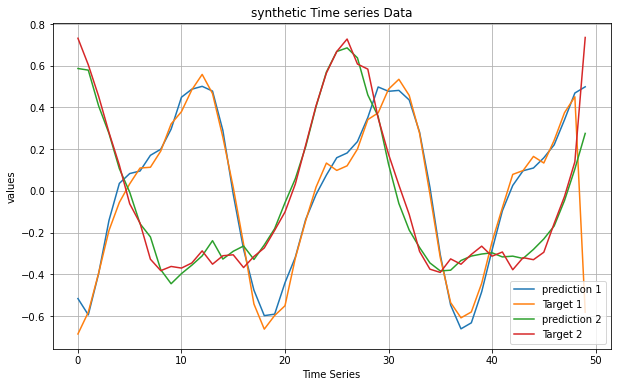

In [40]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))

for i in  range(2):
    plt.plot(prediction[i,:,0],label=f'prediction {i + 1}')
    plt.plot(y_val[i,:,0],label=f'Target {i + 1}')
    
    
plt.title('synthetic Time series Data')   
plt.xlabel("Time Series")
plt.ylabel("values")
plt.legend()
plt.grid(True)
plt.show()